In [1]:
library(haven)
library(dplyr)
library(visreg)
CollegeDistance <- read_dta("http://wps.aw.com/wps/media/objects/11422/11696965/empirical/empex_tb/CollegeDistance.dta")
glimpse(CollegeDistance)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Observations: 3,796
Variables: 14
$ female   <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1...
$ black    <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0...
$ hispanic <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bytest   <dbl> 39.15, 48.87, 48.74, 40.40, 40.48, 54.71, 56.07, 54.85, 64...
$ dadcoll  <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1...
$ momcoll  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1...
$ ownhome  <dbl> 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ urban    <dbl> 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0...
$ cue80    <dbl> 6.2, 6.2, 6.2, 6.2, 5.6, 5.6, 7.2, 7.2, 5.9, 5.9, 5.9, 5.9...
$ stwmfg80 <dbl> 8.09, 8.09, 8.09, 8.09, 8.09, 8.09, 8.85, 8.85, 8.09, 8.09...
$ dist     <dbl> 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 3.0, 3.0, 3.0, 3.0...
$ tuition  <dbl> 0.88915, 0.88915, 0.88915, 0.88915, 0.88915, 0.88915, 0.84...
$ incomehi <dbl> 1

In [6]:
summary(CollegeDistance)

     female           black           hispanic          bytest     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :28.95  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:43.87  
 Median :1.0000   Median :0.0000   Median :0.0000   Median :51.39  
 Mean   :0.5453   Mean   :0.1926   Mean   :0.1499   Mean   :51.00  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:57.97  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :71.36  
    dadcoll          momcoll          ownhome           urban       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :1.0000   Median :0.0000  
 Mean   :0.2021   Mean   :0.1394   Mean   :0.8193   Mean   :0.2439  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
     cue80           stwmfg80           d

In [7]:
library(psych)
describe(CollegeDistance) ## Describes in more detail the Yogurt data frame

vars n    mean       sd        median trimmed     mad        min     
female    1   3796  0.5453109 0.4980083  1.000  0.55661619  0.0000000  0.00000
black     2   3796  0.1925711 0.3943710  0.000  0.11586570  0.0000000  0.00000
hispanic  3   3796  0.1498946 0.3570151  0.000  0.06254115  0.0000000  0.00000
bytest    4   3796 51.0019310 8.8192514 51.390 51.03759710 10.4597406 28.95000
dadcoll   5   3796  0.2020548 0.4015858  0.000  0.12771560  0.0000000  0.00000
momcoll   6   3796  0.1393572 0.3463645  0.000  0.04937459  0.0000000  0.00000
ownhome   7   3796  0.8192835 0.3848338  1.000  0.89894668  0.0000000  0.00000
urban     8   3796  0.2439410 0.4295141  0.000  0.18005267  0.0000000  0.00000
cue80     9   3796  7.6548735 2.8657700  7.200  7.37781432  2.5204197  1.40000
stwmfg80 10   3796  9.5564989 1.3644112  9.920  9.55975645  0.5337355  6.59000
dist     11   3796  1.7249210 2.1338357  1.000  1.32685978  1.1860799  0.00000
tuition  12   3796  0.9131396 0.2835778  0.903  0.91524162  0.3663653  0.43418
incomehi 13   3796  0.2863541 0.4521164  0.000  0.23304806  0.0000000  0.00000
ed       14   3796 13.8292940 1.8139688 13.000 13.68531929  1.4826000 12.00000
         max      range     skew        kurtosis   se         
female    1.00000  1.000000 -0.18192033 -1.9674231 0.008083017
black     1.00000  1.000000  1.55867399  0.4295780 0.006400912
hispanic  1.00000  1.000000  1.96077484  1.8451242 0.005794601
bytest   71.36000 42.410000 -0.05525453 -0.9062499 0.143142507
dadcoll   1.00000  1.000000  1.48345251  0.2006844 0.006518013
momcoll   1.00000  1.000000  2.08189780  2.3349137 0.005621734
ownhome   1.00000  1.000000 -1.65889435  0.7521288 0.006246118
urban     1.00000  1.000000  1.19200529 -0.5792758 0.006971309
cue80    24.90000 23.500000  1.42662182  4.7302979 0.046513415
stwmfg80 12.15000  5.559999 -0.29779965 -0.5615298 0.022145330
dist     16.00000 16.000000  2.90343694 12.4733006 0.034633619
tuition   1.40416  0.969980 -0.15269083 -0.9877552 0.004602663
incomehi  1.00000  1.000000  0.94484363 -1.1075621 0.007338160
ed       18.00000  6.000000  0.41283538 -1.2809267 0.029441960

In [2]:
cor(CollegeDistance)

female       black       hispanic    bytest      dadcoll    
female    1.000000000  0.04478205 -0.03302302 -0.07289937 -0.03854340
black     0.044782050  1.00000000 -0.20506904 -0.31467768 -0.11264367
hispanic -0.033023018 -0.20506904  1.00000000 -0.12989571 -0.06794587
bytest   -0.072899371 -0.31467768 -0.12989571  1.00000000  0.25586014
dadcoll  -0.038543401 -0.11264367 -0.06794587  0.25586014  1.00000000
momcoll  -0.017521065 -0.03640195 -0.07094757  0.19748799  0.44540301
ownhome  -0.046632926 -0.14045532 -0.07704685  0.12874932  0.07776654
urban    -0.004875662  0.18928751  0.15327707 -0.10373517 -0.07195792
cue80     0.027641790 -0.06554238  0.09065140 -0.01840957 -0.08830895
stwmfg80 -0.031614447 -0.16203035 -0.03376489  0.11265099  0.02433184
dist     -0.003368956 -0.09989332  0.02114091 -0.06153932 -0.11325766
tuition  -0.001989500 -0.02073031 -0.26642255  0.17180732  0.07223171
incomehi -0.048863884 -0.12018661 -0.09947671  0.17593158  0.36045622
ed       -0.002228095 -0.10395177 -0.01744247  0.47600413  0.29297352
         momcoll      ownhome      urban        cue80        stwmfg80    
female   -0.017521065 -0.046632926 -0.004875662  0.027641790 -0.031614447
black    -0.036401953 -0.140455316  0.189287507 -0.065542381 -0.162030352
hispanic -0.070947568 -0.077046850  0.153277074  0.090651398 -0.033764887
bytest    0.197487988  0.128749320 -0.103735173 -0.018409568  0.112650989
dadcoll   0.445403013  0.077766543 -0.071957922 -0.088308949  0.024331839
momcoll   1.000000000  0.066421483 -0.044360318 -0.079993211 -0.001643719
ownhome   0.066421483  1.000000000 -0.125392632  0.015110816  0.078427480
urban    -0.044360318 -0.125392632  1.000000000 -0.036417210 -0.039086354
cue80    -0.079993211  0.015110816 -0.036417210  1.000000000  0.311321561
stwmfg80 -0.001643719  0.078427480 -0.039086354  0.311321561  1.000000000
dist     -0.079642397  0.050378121 -0.295551459  0.249481374 -0.008638161
tuition   0.041328935 -0.001027916 -0.048455946  0.199838900  0.289825490
incomehi  0.253276558  0.135453753 -0.084352593 -0.065536951  0.084828254
ed        0.233311833  0.092818819 -0.018914574 -0.009724352  0.021936507
         dist         tuition      incomehi    ed          
female   -0.003368956 -0.001989500 -0.04886388 -0.002228095
black    -0.099893318 -0.020730314 -0.12018661 -0.103951768
hispanic  0.021140913 -0.266422551 -0.09947671 -0.017442465
bytest   -0.061539317  0.171807321  0.17593158  0.476004125
dadcoll  -0.113257661  0.072231709  0.36045622  0.292973520
momcoll  -0.079642397  0.041328935  0.25327656  0.233311833
ownhome   0.050378121 -0.001027916  0.13545375  0.092818819
urban    -0.295551459 -0.048455946 -0.08435259 -0.018914574
cue80     0.249481374  0.199838900 -0.06553695 -0.009724352
stwmfg80 -0.008638161  0.289825490  0.08482825  0.021936507
dist      1.000000000 -0.191838459 -0.08453223 -0.086310913
tuition  -0.191838459  1.000000000  0.10515168  0.057107820
incomehi -0.084532225  0.105151684  1.00000000  0.216734001
ed       -0.086310913  0.057107820  0.21673400  1.000000000

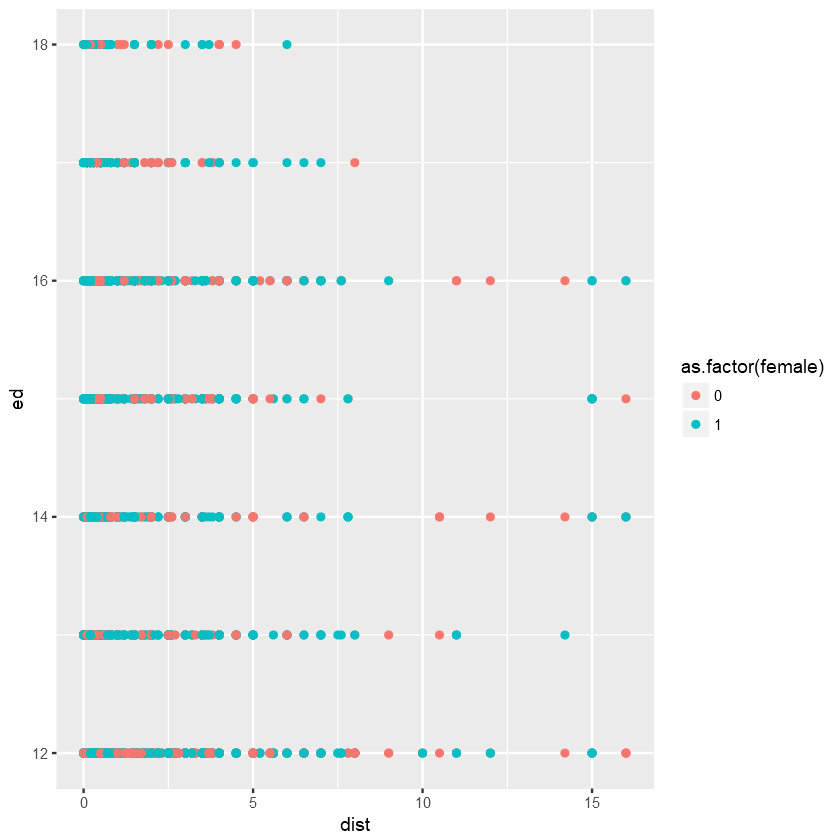

In [9]:
library(ggplot2)
p= ggplot(data = CollegeDistance, mapping = aes(x=dist  , y=ed, color = as.factor(female))) 
p+ geom_point()

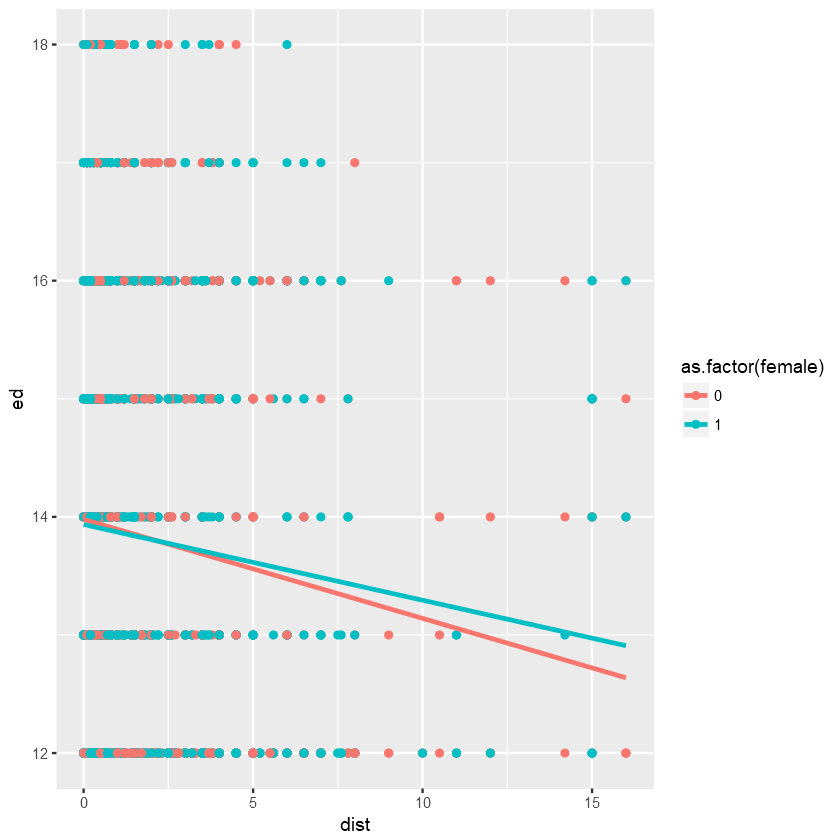

In [10]:
p + geom_point()+ stat_smooth(method = "lm" , fill=NA)

In [14]:
model1 =lm(ed~dist,CollegeDistance )

In [16]:
summary(model1)


Call:
lm(formula = ed ~ dist, data = CollegeDistance)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9559 -1.8091 -0.6624  2.0515  4.4844 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.95586    0.03772 369.945   <2e-16 ***
dist        -0.07337    0.01375  -5.336    1e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.807 on 3794 degrees of freedom
Multiple R-squared:  0.00745,	Adjusted R-squared:  0.007188 
F-statistic: 28.48 on 1 and 3794 DF,  p-value: 1.004e-07


In [17]:
model2 =lm(ed~.,CollegeDistance )

In [19]:
summary(model2)


Call:
lm(formula = ed ~ ., data = CollegeDistance)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2940 -1.1356 -0.2267  1.1653  5.0831 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.893532   0.252993  35.153  < 2e-16 ***
female       0.143922   0.050445   2.853  0.00435 ** 
black        0.338367   0.072226   4.685 2.90e-06 ***
hispanic     0.349177   0.078242   4.463 8.33e-06 ***
bytest       0.093069   0.003182  29.251  < 2e-16 ***
dadcoll      0.574015   0.073755   7.783 9.09e-15 ***
momcoll      0.378670   0.081529   4.645 3.52e-06 ***
ownhome      0.143258   0.066881   2.142  0.03226 *  
urban        0.065166   0.063650   1.024  0.30599    
cue80        0.028260   0.009874   2.862  0.00423 ** 
stwmfg80    -0.042633   0.020208  -2.110  0.03496 *  
dist        -0.032586   0.013324  -2.446  0.01450 *  
tuition     -0.184835   0.101062  -1.829  0.06749 .  
incomehi     0.374115   0.060762   6.157 8.18e-10 ***
---
Signif. codes:  0 '***' 0






The datafile Lead_Mortality contains data on 172 U.S. cities in 1900. These data were provided
by Professor Karen Clay of Carnegie Mellon University and are a subset of the data used in her
paper with Werner Troesken and Michael Haines “Lead and Mortality,” Review of Economics
and Statistics, 2014. 



https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Lead_Mortality_Description.pdf



In [80]:
library(haven)
library(dplyr)
library(visreg)
lead <- read_dta("http://wps.aw.com/wps/media/objects/11422/11696965/data3eu/lead_mortality.dta")
glimpse(lead)

Observations: 172
Variables: 15
$ year          <dbl> 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900,...
$ city          <chr> "Alameda", "Albany", "Allegheny", "Allentown", "Altoo...
$ state         <chr> "CA", "NY", "PA", "PA", "PA", "NY", "MI", "GA", "NJ",...
$ age           <dbl> 28.95484, 30.34768, 27.08730, 27.76405, 27.03753, 28....
$ hardness      <dbl> 97, 43, 111, 176, 111, 43, 269, 15, 12, 120, 9, 47, 9...
$ ph            <dbl> 7.6, 7.3, 7.3, 7.7, 7.3, 7.3, 8.0, 6.8, 6.2, 6.8, 6.9...
$ infrate       <dbl> 0.1097561, 0.2986185, 0.4468413, 0.3841808, 0.4678663...
$ typhoid_rate  <dbl> 0.024390243, 0.041445270, 0.093990758, 0.028248588, 0...
$ np_tub_rate   <dbl> 0.030487806, 0.013815090, 0.027734976, 0.005649718, 0...
$ mom_rate      <dbl> 0.1951219, 0.1795962, 0.1926040, 0.1977401, 0.1825193...
$ population    <dbl> 164, 941, 1298, 354, 389, 209, 145, 898, 278, 303, 11...
$ precipitation <dbl> 1.850307, 3.278735, 3.350943, 3.350943, 3.350943, 3.2...
$ temperature   <dbl

In [81]:
#http://stackoverflow.com/questions/26581410/dplyr-summarizing-count-and-conditional-aggregate-functions-on-the-same-factor

lead  %>% mutate(infrate=as.numeric(as.character(infrate)), lead = as.factor(lead)) %>%
   group_by(lead) %>% summarise(avg.infrate=mean(infrate,na.rm=TRUE))



lead avg.infrate
1 0    0.3811679  
2 1    0.4032576

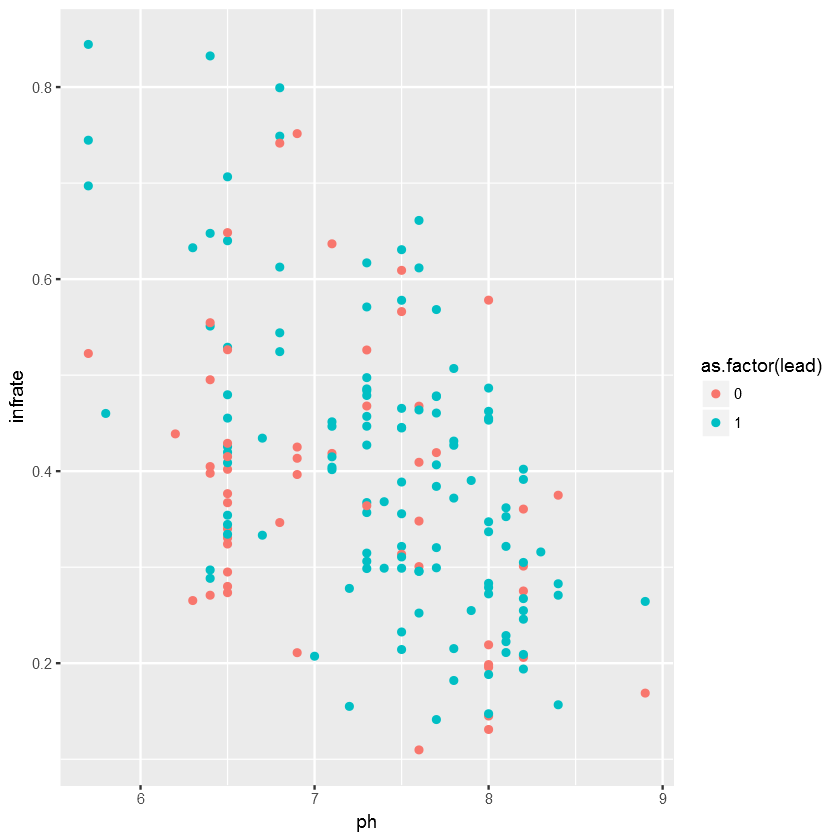

In [87]:
library(ggplot2)
p= ggplot(data = lead, mapping = aes(x=ph  , y=infrate, color = as.factor(lead))) 
p+ geom_point()

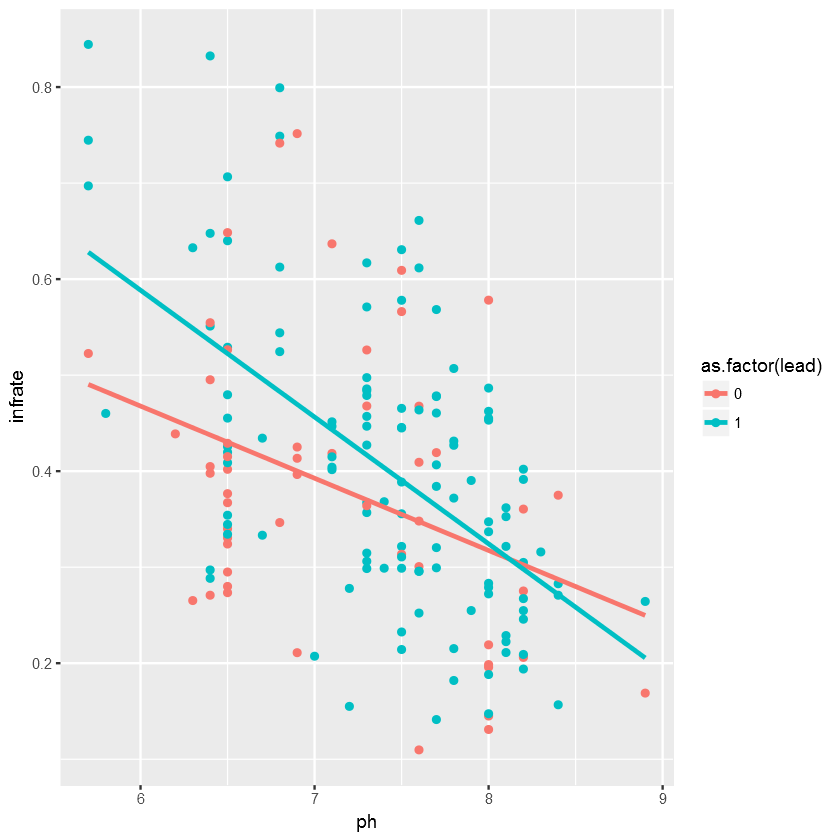

In [88]:
p + geom_point()+ stat_smooth(method = "lm" , fill=NA)

# , se = FALSE

In [82]:
t.test(formula = lead$infrate ~ lead$lead)


	Welch Two Sample t-test

data:  lead$infrate by lead$lead
t = -0.90387, df = 109.29, p-value = 0.3681
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07052551  0.02634606
sample estimates:
mean in group 0 mean in group 1 
      0.3811679       0.4032576 


In [83]:
t.test(lead$infrate[lead$lead== 0], lead$infrate[lead$lead== 1], "g", 1, FALSE, TRUE, 0.95)


	Two Sample t-test

data:  lead$infrate[lead$lead == 0] and lead$infrate[lead$lead == 1]
t = -41.289, df = 170, p-value = 1
alternative hypothesis: true difference in means is greater than 1
95 percent confidence interval:
 -0.06303082         Inf
sample estimates:
mean of x mean of y 
0.3811679 0.4032576 


In [84]:


mean(lead$infrate[lead$lead== 1])


[1] 0.4032576

In [93]:
#p307 version4
model1 <- lm(infrate~lead+ph+I(lead*ph),data = lead)
summary(model1)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph), data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27492 -0.09502 -0.00266  0.07965  0.35139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.91890    0.17447   5.267  4.2e-07 ***
lead          0.46180    0.22122   2.087  0.03835 *  
ph           -0.07518    0.02427  -3.098  0.00229 ** 
I(lead * ph) -0.05686    0.03040  -1.871  0.06312 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1303 on 168 degrees of freedom
Multiple R-squared:  0.2719,	Adjusted R-squared:  0.2589 
F-statistic: 20.91 on 3 and 168 DF,  p-value: 1.467e-11


In [115]:
#http://drewdimmery.com/robust-ses-in-r/
#heteroskedasticity robust standard errors in R. In Stata, this is trivially easy: you simply add “, robust” to the end of your regression command (or , cluster(var) for cluster robust SEs). In R, there’s a bit more flexibility, but this comes at the cost of a little added complication. Simplest first.
require("sandwich")
require("lmtest")
model1$newse<-vcovHC(model1)
coeftest(model1,model1$newse)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   0.918904   0.155541  5.9078 1.876e-08 ***
lead          0.461798   0.213727  2.1607   0.03214 *  
ph           -0.075179   0.021689 -3.4663   0.00067 ***
I(lead * ph) -0.056862   0.028940 -1.9648   0.05108 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [100]:
#library(AER)
library(car)
linearHypothesis(model1,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df Df F        Pr(>F)    
1 170    NA       NA         NA
2 168     2 3.936032 0.02135224

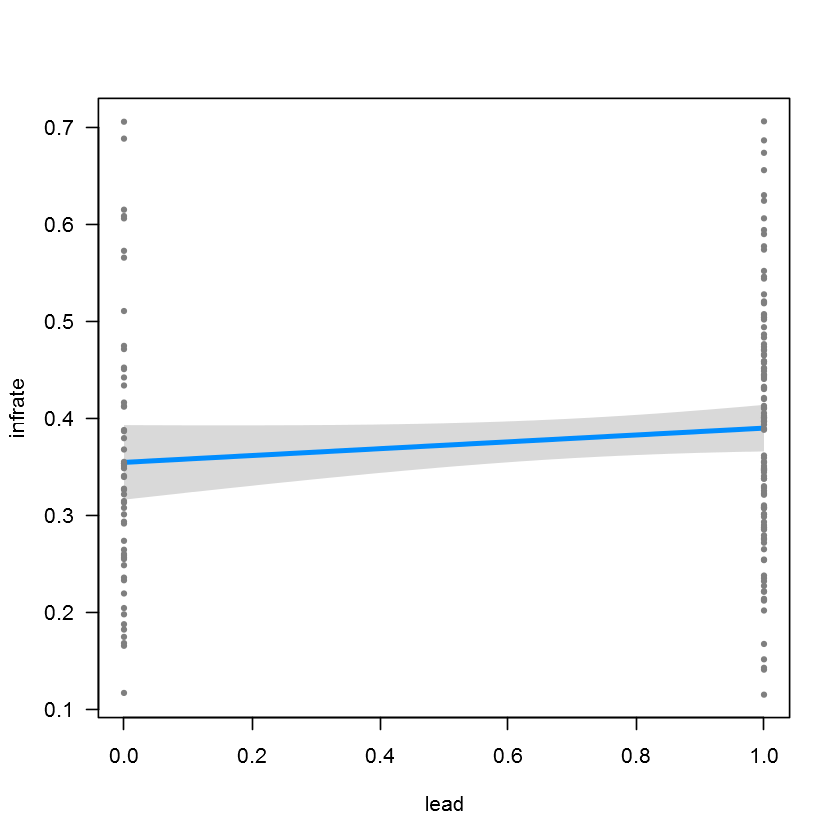

In [101]:
visreg(model1, "lead", type="conditional")

In [105]:
model2 <- lm(infrate~ lead +ph+I(lead*ph)+mom_rate+np_tub_rate+typhoid_rate,data = lead)
summary(model2)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph) + mom_rate + 
    np_tub_rate + typhoid_rate, data = lead)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.257169 -0.082441 -0.008178  0.085858  0.301600 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.76666    0.17964   4.268 3.32e-05 ***
lead          0.52205    0.21119   2.472 0.014454 *  
ph           -0.07123    0.02318  -3.073 0.002479 ** 
I(lead * ph) -0.06545    0.02900  -2.257 0.025334 *  
mom_rate      0.13247    0.29744   0.445 0.656630    
np_tub_rate   2.33233    0.80444   2.899 0.004249 ** 
typhoid_rate  1.25344    0.33841   3.704 0.000289 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1239 on 165 degrees of freedom
Multiple R-squared:  0.3536,	Adjusted R-squared:  0.3301 
F-statistic: 15.04 on 6 and 165 DF,  p-value: 1.069e-13


In [106]:
linearHypothesis(model2,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df Df F        Pr(>F)    
1 167    NA       NA         NA
2 165     2 4.724529 0.01011028

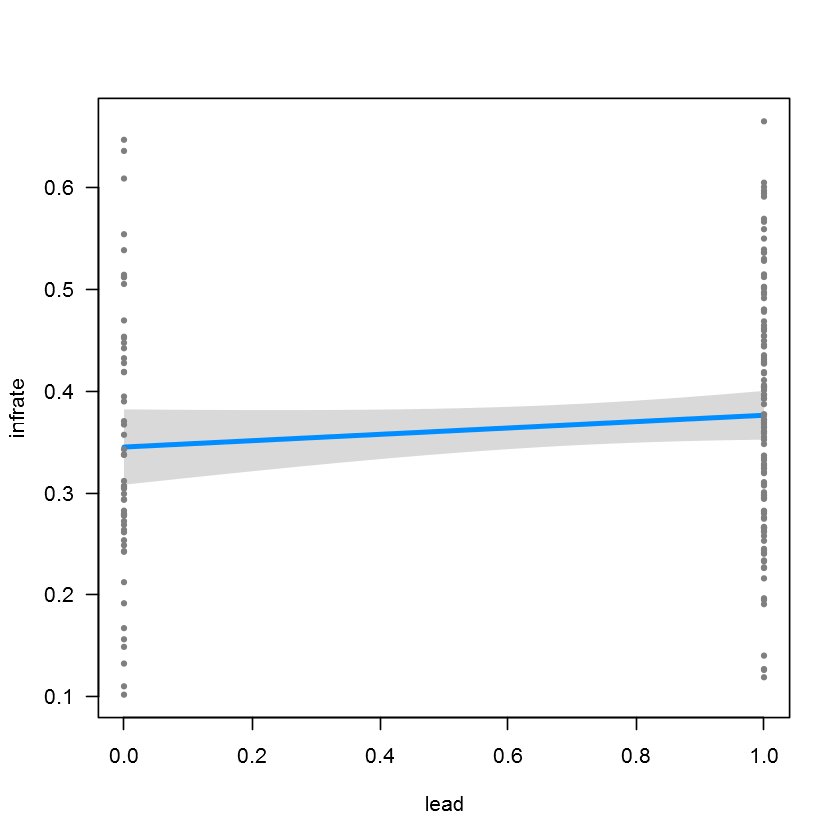

In [107]:
visreg(model2, "lead", type="conditional")

In [112]:
model4 <- lm(infrate~ lead +ph+I(lead*ph)+np_tub_rate+typhoid_rate+hardness+precipitation+temperature,data = lead)
summary(model3)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph) + np_tub_rate + 
    typhoid_rate + hardness + precipitation + temperature, data = lead)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.298122 -0.081011 -0.008036  0.078393  0.312767 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.2124983  0.1989007   1.068 0.286936    
lead           0.4537721  0.2014461   2.253 0.025621 *  
ph            -0.0355440  0.0249430  -1.425 0.156066    
I(lead * ph)  -0.0551874  0.0276446  -1.996 0.047565 *  
np_tub_rate    2.0134319  0.7657999   2.629 0.009378 ** 
typhoid_rate   0.9341702  0.3308150   2.824 0.005337 ** 
hardness      -0.0001632  0.0001099  -1.485 0.139521    
precipitation  0.0727929  0.0197722   3.682 0.000315 ***
temperature    0.0022263  0.0020193   1.102 0.271883    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1164 on 163 degrees of freedom
Multiple R-squared:  0.4357,	Ad

In [113]:
linearHypothesis(model4,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df Df F        Pr(>F)    
1 165    NA       NA         NA
2 163     2 4.410415 0.01363362

In [ ]:
model4 <- lm(infrate~ lead +ph+I(lead*ph)+hardness+precipitation+temperature,data = lead)
summary(model3)

In [92]:
model2 <- lm(infrate~ lead+ph+I(lead*ph),data = lead)
summary(model2)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph), data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27492 -0.09502 -0.00266  0.07965  0.35139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.91890    0.17447   5.267  4.2e-07 ***
lead          0.46180    0.22122   2.087  0.03835 *  
ph           -0.07518    0.02427  -3.098  0.00229 ** 
I(lead * ph) -0.05686    0.03040  -1.871  0.06312 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1303 on 168 degrees of freedom
Multiple R-squared:  0.2719,	Adjusted R-squared:  0.2589 
F-statistic: 20.91 on 3 and 168 DF,  p-value: 1.467e-11


In [90]:
mean(lead$ph)

[1] 7.322674

In [91]:
model3 <- lm(infrate~ as.factor(lead)+ph+I(lead*ph)+population+temperature,data = lead)
summary(model3)


Call:
lm(formula = infrate ~ as.factor(lead) + ph + I(lead * ph) + 
    population + temperature, data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30337 -0.09061 -0.00859  0.07073  0.40042 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.736e-01  1.818e-01   3.705 0.000288 ***
as.factor(lead)1  3.485e-01  2.165e-01   1.609 0.109417    
ph               -8.844e-02  2.376e-02  -3.723 0.000270 ***
I(lead * ph)     -4.221e-02  2.973e-02  -1.420 0.157560    
population        1.821e-06  3.109e-06   0.586 0.558703    
temperature       6.971e-03  1.922e-03   3.626 0.000382 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.126 on 166 degrees of freedom
Multiple R-squared:  0.3266,	Adjusted R-squared:  0.3063 
F-statistic:  16.1 on 5 and 166 DF,  p-value: 6.275e-13
